In [3]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Activation functions

In [4]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def tanh(x):
    return np.tanh(x)

def cosine(x):
    return np.cos(x)

def gaussian(x):
    return np.exp(-((x**2)/2))

In [5]:
activations_list = [sigmoid,tanh,cosine,gaussian]
act_dict = {0.1:sigmoid, 0.2:tanh, 0.3:cosine, 0.4:gaussian}

In [6]:
f = np.random.choice(list(act_dict.keys()))
f

0.4

In [7]:
h = np.random.choice(list(act_dict.keys()))
h

0.1

### Testing activation functions

In [8]:
test_inputs = np.arange(-10,10,0.01)

Text(0.5, 1.0, 'Gaussian')

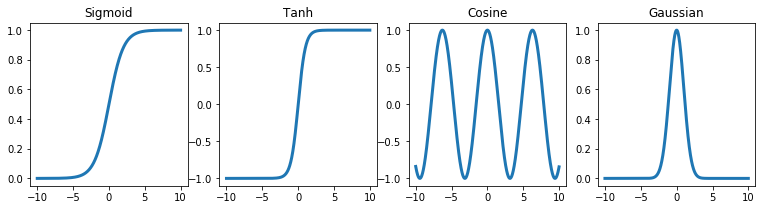

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(13,3))
axes[0].plot(test_inputs,sigmoid(test_inputs),linewidth=3)
axes[0].set_title("Sigmoid")
axes[1].plot(test_inputs,tanh(test_inputs),linewidth=3)
axes[1].set_title("Tanh")
axes[2].plot(test_inputs,cosine(test_inputs),linewidth=3)
axes[2].set_title("Cosine")
axes[3].plot(test_inputs,gaussian(test_inputs),linewidth=3)
axes[3].set_title("Gaussian")

## Inputs & Outputs

In [10]:
df = pd.read_csv("Data/1in_linear.txt", sep="\t", header=None)
df.columns = ["x","y"]
x = df["x"]
y = df["y"]

df.head()

,x,y
0,-1.00,-1.00
1,-0.98,-0.98
2,-0.96,-0.96
3,-0.94,-0.94
4,-0.92,-0.92


In [11]:
#I thought about having our imputs and outputs as array of 1D, so maybe they can be easier to comare
data = np.loadtxt("Data/1in_tanh.txt")
data.shape

(101, 2)

In [12]:
imput = data[:, :1] 
imput.shape

(101, 1)

In [13]:
output = data[:, 1:]
output.shape

(101, 1)

## Simplified Neural Network

Source: https://www.youtube.com/watch?v=bxe2T-V8XRs




x = input <br>
W1 = weights from input layer to hidden layer <br>
z2 = x * W1 <br>
a2 = activation of z2 (x * W1) <br>
W2  weights from hidden layer to output layer <br>
z3 = a2 * W2 activation of z3 <br>
yHat = predicted output <br>

In [14]:
class SimplifiedNeuralNetwork(object):
    
    def __init__(self):
        self.fitness = -1.
        
        self.inputLayerSize=1
        self.outputLayerSize=1
        self.hiddenlayerSize=3
                
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenlayerSize)
        self.W2 = np.random.randn(self.hiddenlayerSize, self.outputLayerSize)
        self.a2_func = np.random.choice(list(act_dict.keys()))
        self.yHat_func = np.random.choice(list(act_dict.keys()))
        
    def forward(self, X):
        self.z2 = np.dot(X, self.W1) # Product of input layer and weights1
        self.a2 = act_dict[self.a2_func](self.z2) # Activation & z2  
        self.z3 = np.dot(self.a2, self.W2) # Product of a2 & weights2
        yHat = act_dict[self.yHat_func](self.z3) # Activation of z3
        return yHat   
    
    def __str__(self):
        return f"Network:W1{self.W1}, Fitness:{self.fitness}, Imput value:{imput}, Predicted values:{yHat}"   
    
    @property
    def getParams(self):
        array = self.W1.ravel()
        array = np.append(array,self.a2_func)
        array = np.append(array,self.W2.ravel())
        array = np.append(array,self.yHat_func)
        return array     

In [15]:
nn1 = SimplifiedNeuralNetwork()
yHat = nn1.forward(imput)
yHat.shape
#yHat, output

(101, 1)

In [18]:
def rmse(predict, target):
    rmse_val = np.square(np.subtract(target, predict)).mean()
    return rmse_val

def feedForward(networks):
    for network in networks:
            yHat = network.forward(imput)
            error = rmse(yHat,output)
            network.fitness = error
    return network

In [19]:
meansq = rmse(yHat, output)
meansq

1.5807395345484638

## PSO

source: https://jamesmccaffrey.wordpress.com/2015/06/09/particle-swarm-optimization-using-python/


source: https://medium.com/analytics-vidhya/implementing-particle-swarm-optimization-pso-algorithm-in-python-9efc2eb179a6

In [29]:
class Particle():
    
    def __init__(self,SimplifiedNeuralNetwork):
        self.position = SimplifiedNeuralNetwork.getParams
        self.velocity = np.zeros(SimplifiedNeuralNetwork.getParams.shape)
        self.personal_best = np.zeros(SimplifiedNeuralNetwork.getParams.shape)
        
    def move(self):
        self.position = self.position + self.velocity
        
def Solve(max_epochs,num_networks):
    networks = [SimplifiedNeuralNetwork() for i in range(num_networks)]
    Y = [feedForward(networks)]
    
    for network in Y:
        print(network)
        #prtint(Y)
        
    

In [30]:
g = np.array([0,0])
g

array([0, 0])

In [31]:
h = np.zeros(nn1.getParams.shape)
h

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [32]:
Solve(10,10)

Network:W1[[ 0.77611955  0.15432288 -1.7007932 ]], Fitness:1.1221898311245626, Imput value:[[-1.  ]
 [-0.98]
 [-0.96]
 [-0.94]
 [-0.92]
 [-0.9 ]
 [-0.88]
 [-0.86]
 [-0.84]
 [-0.82]
 [-0.8 ]
 [-0.78]
 [-0.76]
 [-0.74]
 [-0.72]
 [-0.7 ]
 [-0.68]
 [-0.66]
 [-0.64]
 [-0.62]
 [-0.6 ]
 [-0.58]
 [-0.56]
 [-0.54]
 [-0.52]
 [-0.5 ]
 [-0.48]
 [-0.46]
 [-0.44]
 [-0.42]
 [-0.4 ]
 [-0.38]
 [-0.36]
 [-0.34]
 [-0.32]
 [-0.3 ]
 [-0.28]
 [-0.26]
 [-0.24]
 [-0.22]
 [-0.2 ]
 [-0.18]
 [-0.16]
 [-0.14]
 [-0.12]
 [-0.1 ]
 [-0.08]
 [-0.06]
 [-0.04]
 [-0.02]
 [ 0.  ]
 [ 0.02]
 [ 0.04]
 [ 0.06]
 [ 0.08]
 [ 0.1 ]
 [ 0.12]
 [ 0.14]
 [ 0.16]
 [ 0.18]
 [ 0.2 ]
 [ 0.22]
 [ 0.24]
 [ 0.26]
 [ 0.28]
 [ 0.3 ]
 [ 0.32]
 [ 0.34]
 [ 0.36]
 [ 0.38]
 [ 0.4 ]
 [ 0.42]
 [ 0.44]
 [ 0.46]
 [ 0.48]
 [ 0.5 ]
 [ 0.52]
 [ 0.54]
 [ 0.56]
 [ 0.58]
 [ 0.6 ]
 [ 0.62]
 [ 0.64]
 [ 0.66]
 [ 0.68]
 [ 0.7 ]
 [ 0.72]
 [ 0.74]
 [ 0.76]
 [ 0.78]
 [ 0.8 ]
 [ 0.82]
 [ 0.84]
 [ 0.86]
 [ 0.88]
 [ 0.9 ]
 [ 0.92]
 [ 0.94]
 [ 0.96]
 [ 0.98]
 [ 1.  ]]